## MoRF and LeRF example

In [48]:

# imports
import torch
import torchvision
from torchvision import models as models
import torchvision.transforms as transforms
from torch import nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import copy


In [235]:

perturbation_range = [.01, .05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
transform_tensor = torchvision.transforms.Compose([transforms.ToTensor()])
cifar_train = torchvision.datasets.CIFAR10(root='/workspaces/data/cifar10/explanation', train=True, download=True, transform=transform_tensor)
cifar_test = torchvision.datasets.CIFAR10(root='/workspaces/data/cifar10/explanation', train=False, download=True, transform=transform_tensor)
print("Length of test set: ", len(cifar_test))

Files already downloaded and verified
Files already downloaded and verified
Length of test set:  10000


In [236]:
from road.utils import load_expl
_, explanation_test, _, prediction_test = load_expl(None, '/workspaces/data/cifar10/explanation/ig/base_test.pkl')

In [237]:
def show_img(ax, dataset, iid, th, morf = True, attributions=False):
    """ Plot an item of a dataset. Tranfer axis format from channels-first to channels-last."""
    tup = dataset[iid]
    attribute_map = np.dot(tup[...,:3], [0.299, 0.587, 0.114])
    max_heatmap_val = np.max(attribute_map)
    min_heatmap_val = np.min(attribute_map)
    
    mask =  (attribute_map- min_heatmap_val)/(max_heatmap_val  - min_heatmap_val)
    #ax.matshow(mask)
    map_host  = np.ones(shape= attribute_map.shape)
    map = copy.copy(mask)
    #map = np.linalg.norm(map, axis=2)
    if morf:
        map = (map > (1.0- th ))
    else:
        map = map < th
    map = map * map_host


    if attributions:
        ax.matshow(map)
        #ax.matshow(np.linalg.norm(map, axis=2))
     
    else:
        ax.imshow((map.transpose(0,1).transpose(1,2)))

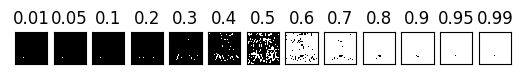

In [238]:
f, axes_list = plt.subplots(1, len(perturbation_range))
img_id = 11
for i in range(len(perturbation_range)):
    show_img(axes_list[i], explanation_test, img_id, perturbation_range[i], morf=True, attributions=True)
    axes_list[i].set_title( perturbation_range[i])

    for ax in axes_list:
        ax.set_xticks([])
        ax.set_yticks([])
  

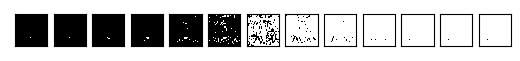

In [239]:
f, axes_list = plt.subplots(1, len(perturbation_range))
img_id = 11
for i in range(len(perturbation_range)):
    show_img(axes_list[i], explanation_test, img_id, perturbation_range[i], morf=False, attributions=True)
    #axes_list[i].set_title( perturbation_range[i])

    for ax in axes_list:
        ax.set_xticks([])
        ax.set_yticks([])
  

In [ ]:
image.png